## Clase 1-2:

1.- ¿Cuál es el vector de estado de un sistema compuesto por 3 qubits , estando los qubits individuales(e independientes) en los estados  $|+\rangle $ , $|+\rangle $,$| -\rangle $,? Luego hacer las mediciones parciales para el qubit central, repetir lo mismo con qiskit.

2.- ¿Cuántos qubits independientes tiene como mínimo el siguiente sistema?

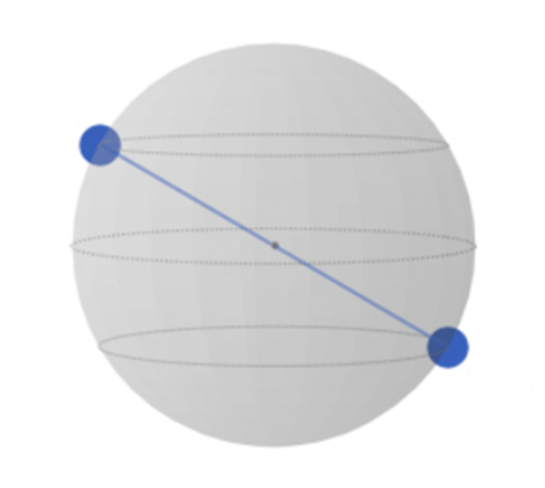

3.- ¿Cómo se escribiría en notación de Dirac una compuerta CU3 desarrollalo e implementalo en qiskit para $\theta = \pi$, $\phi = \frac{\pi}{2}$ y $\lambda = \frac{7\pi}{2}$ 

In [ ]:
######################################## Primera Pregunta ########################################

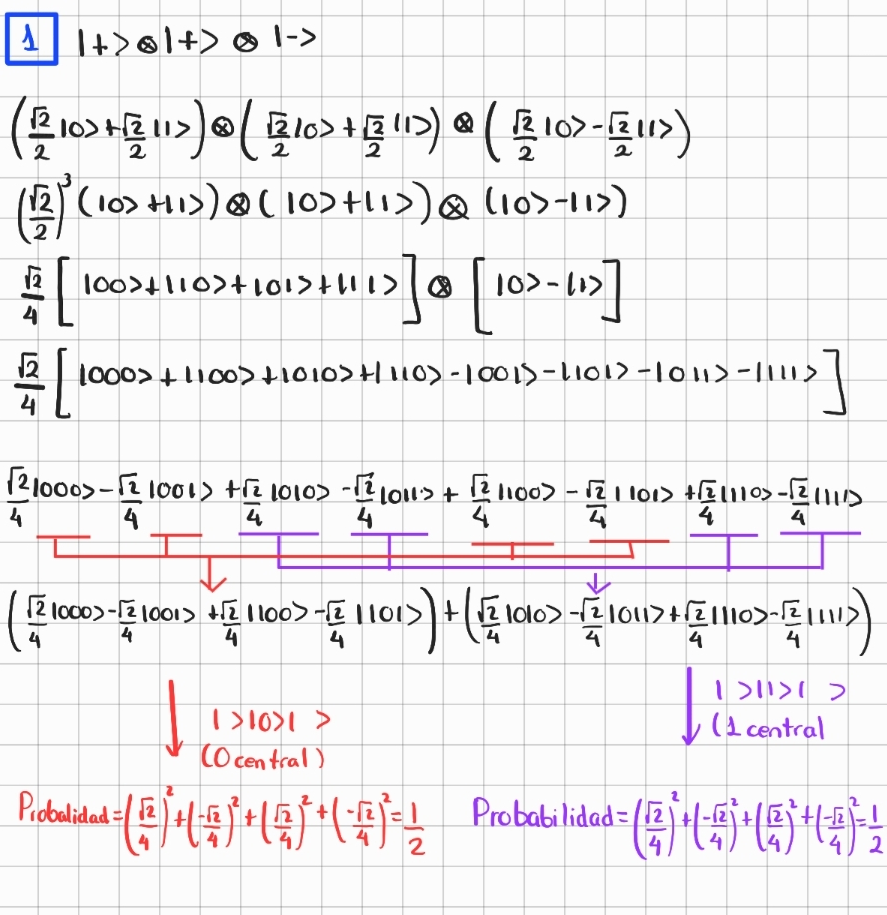

In [7]:
from qiskit.quantum_info import Statevector 
import numpy as np

In [22]:
ket = Statevector.from_label('++-')
ket.draw('Latex')

<IPython.core.display.Latex object>

In [23]:
probs_ket = ket.probabilities_dict([1])
print('probs: {}'.format(probs_ket))

probs: {'0': 0.4999999999999998, '1': 0.4999999999999998}


In [ ]:
######################################## Segunda Pregunta ########################################

In [ ]:
#Prueba: Se visualizarán todos los estados base para n=1,2,3,4 qbits para descubrir cuál podría ofrecer el resultado de la gráfica

In [24]:
from qiskit.visualization import plot_state_qsphere

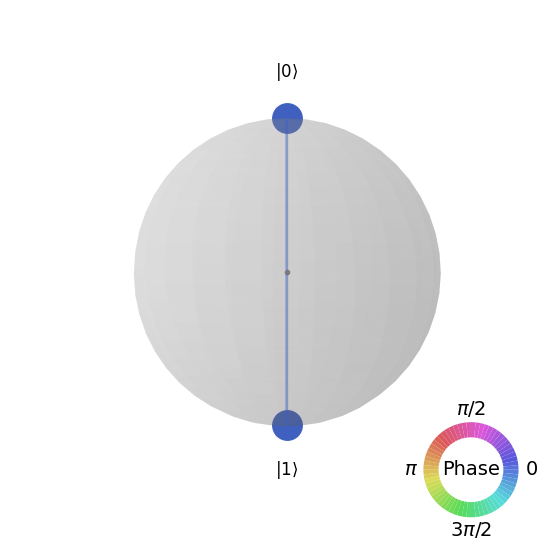

In [35]:
Ket = Statevector.from_label('+')
plot_state_qsphere(Ket)

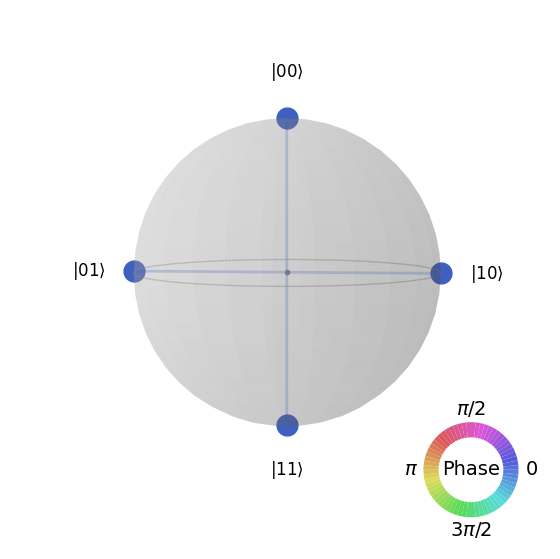

In [36]:
Ket = Statevector.from_label('++')
plot_state_qsphere(Ket)

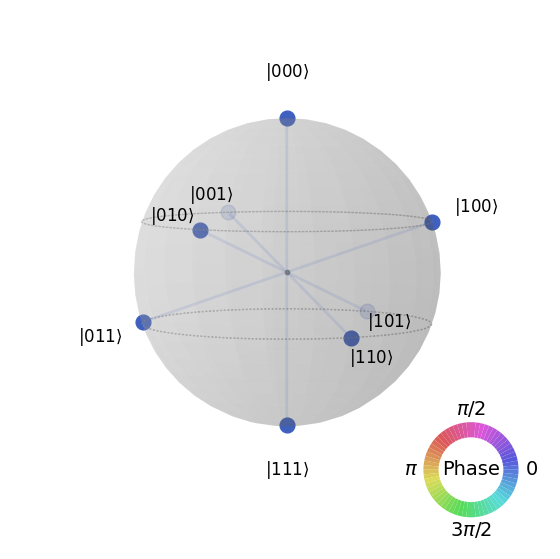

In [37]:
Ket = Statevector.from_label('+++')
plot_state_qsphere(Ket)

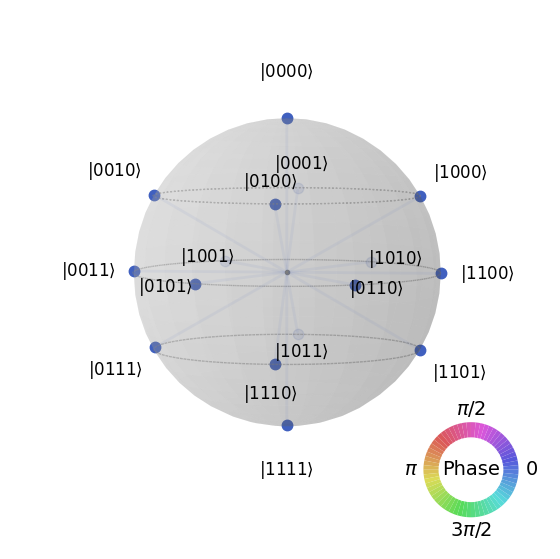

In [38]:
Ket = Statevector.from_label('++++')
plot_state_qsphere(Ket)

In [ ]:
# Solución

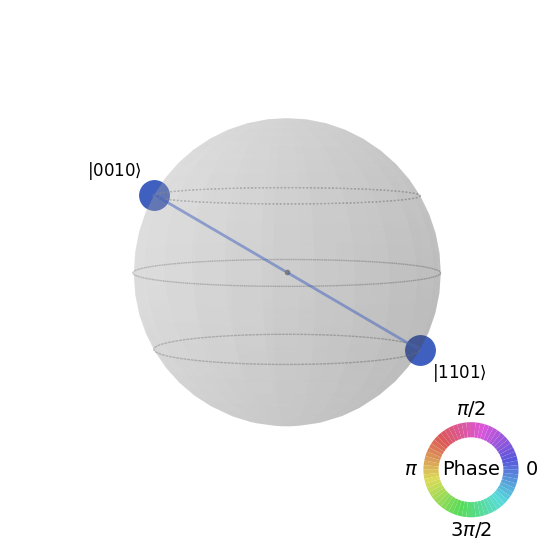

In [20]:
Ket_4_qubits = Statevector([0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0]/np.sqrt(2))
plot_state_qsphere(Ket_4_qubits)

In [ ]:
#Respuesta: Se requieren 4 qbits como mínimo

In [ ]:
######################################## Tercera Pregunta ########################################

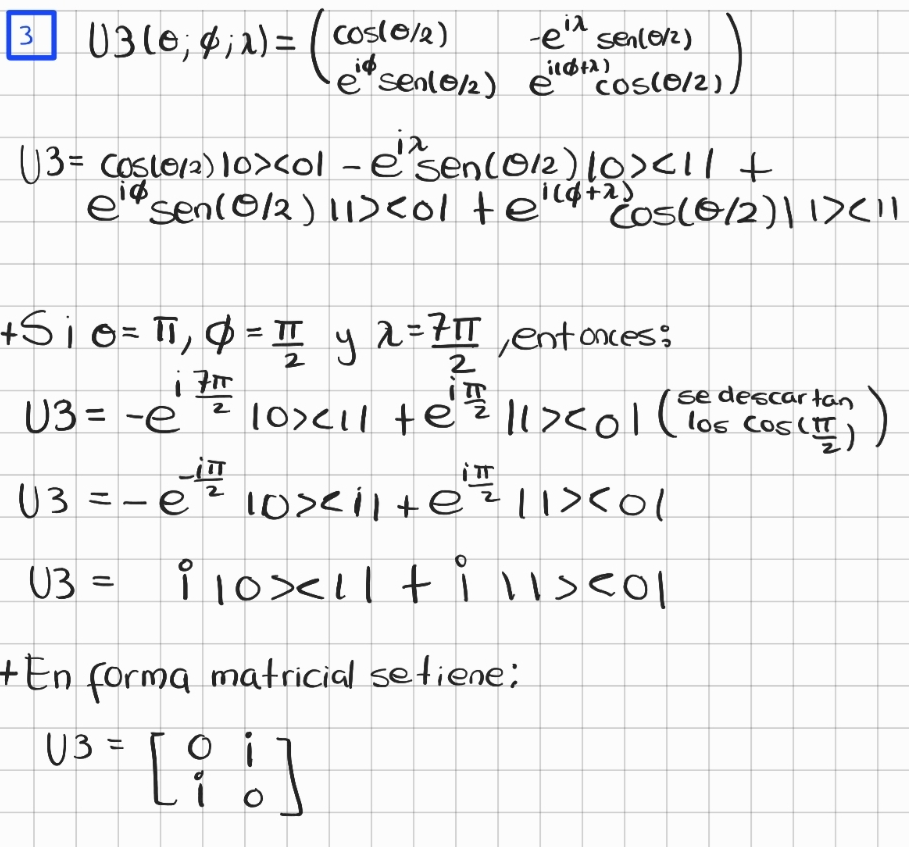

In [ ]:
from qiskit.quantum_info.operators import Operator

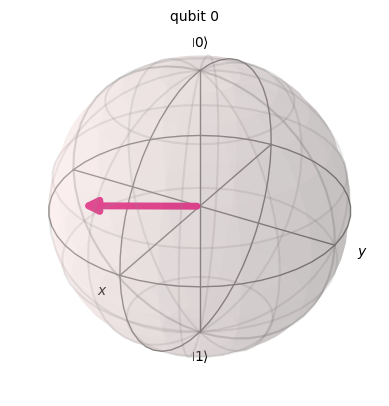

In [82]:
circuito = QuantumCircuit(1)
circuito.initialize(random_statevector(2).data, 0)
plot_bloch_multivector(circuito)

In [83]:
Statevector(circuito).draw("Latex")

<IPython.core.display.Latex object>

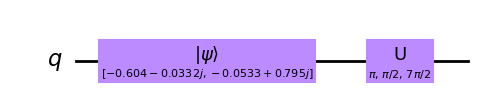

In [84]:
circuito.u(np.pi, np.pi/2, np.pi*7/2, 0)
circuito.draw('mpl')

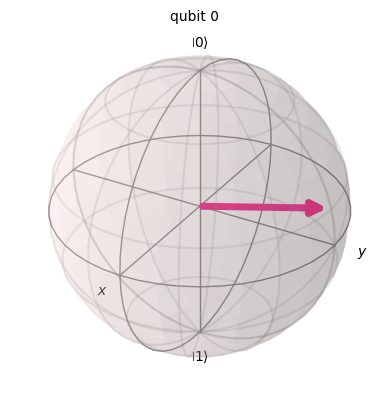

In [85]:
plot_bloch_multivector(circuito)

In [86]:
Statevector(circuito).draw("Latex")

<IPython.core.display.Latex object>

In [ ]:
#Ver la evolución de los estados ayuda a verificar que la compuerta es [[0,1j],[1j,0]]

## Clase 4-5

4.- A partir de la relación existente entre la operación (módulo 2) y el operador XOR ($\oplus$). Mostrar:

\begin{align}
\sum_{i=1}^n x_iz_i \pmod 2=x_1z_1\oplus x_2z_2\oplus\cdots\oplus x_nz_n
\end{align}

5.- Implementa el código para la función oráculo balanceado con $n=3$, la cual retorna el circuito cuántico qc. Considere que $f(x)$ está dado por:

\begin{align}
f(001)&=0\\
f(000)&=0\\
f(111)&=0\\
f(110)&=0\\
f(011)&=1\\
f(010)&=1\\
f(100)&=1\\
f(101)&=1\\
\end{align}

6.- En la construcción más simple posible de un oráculo balanceado, se utiliza la compuerta $CX$, la cual toma como objetivo el $(n+1)$-ésimo qubit del circuito y como control cada uno de los $n$ primeros qubits. Sin embargo, ¿es realmente necesario aplicar $CX$ a todos los $n$ primeros qubits, o podríamos prescindir de algunos y obtener igualmente un oráculo balanceado?

7.- Implemente el algoritmo de Grover para determinar la máxima cantidad de aristas en un grafo de 5 nodos y 6 aristas:

\begin{align}
(0,3)\\
(0,4)\\
(1,3)\\
(1,4)\\
(2,3)\\
(2,4)\\
\end{align}

8.- En el algoritmo de Grover, determine el número de veces que debe ejercutarse el par $U_\omega U_f$ para que el estado final de nuestro circuito coincida con el Ket de estados deseados sabiendo que $x\in\{0,1\}^5$ y hay 4 estados que sastifacen las características de búsqueda.

Extra 1.- Si

\begin{align}
\ket{\psi3}&=U\omega\ket{\psi_2}\
&=\left(2\ket{s}\bra{s}-\mathbb{I}\right)\left(-\sqrt{\frac{a}{2^n}}\ket{A}+\sqrt{\frac{b}{2^n}}\ket{B}\right)
\end{align}

Usando
\begin{align}
\ket{s}\bra{s}=\frac{a}{2^n}\ket{A}\bra{A}+\frac{b}{2^n}\ket{B}\bra{B}+\frac{\sqrt{ab}}{2^n}\left[\ket{A}\bra{B}+\ket{B}\bra{A}\right]
\end{align}
\begin{align}
&\sin\theta=\sqrt{\frac{a}{2^n}}\
&\cos\theta=\sqrt{\frac{b}{2^n}}
\end{align}

Demuestre:
\begin{align}
\ket{\psi_3}=\sin 3\theta\ket{A}+\cos 3\theta\ket{B}
\end{align}

In [ ]:
######################################## Cuarta Pregunta ########################################

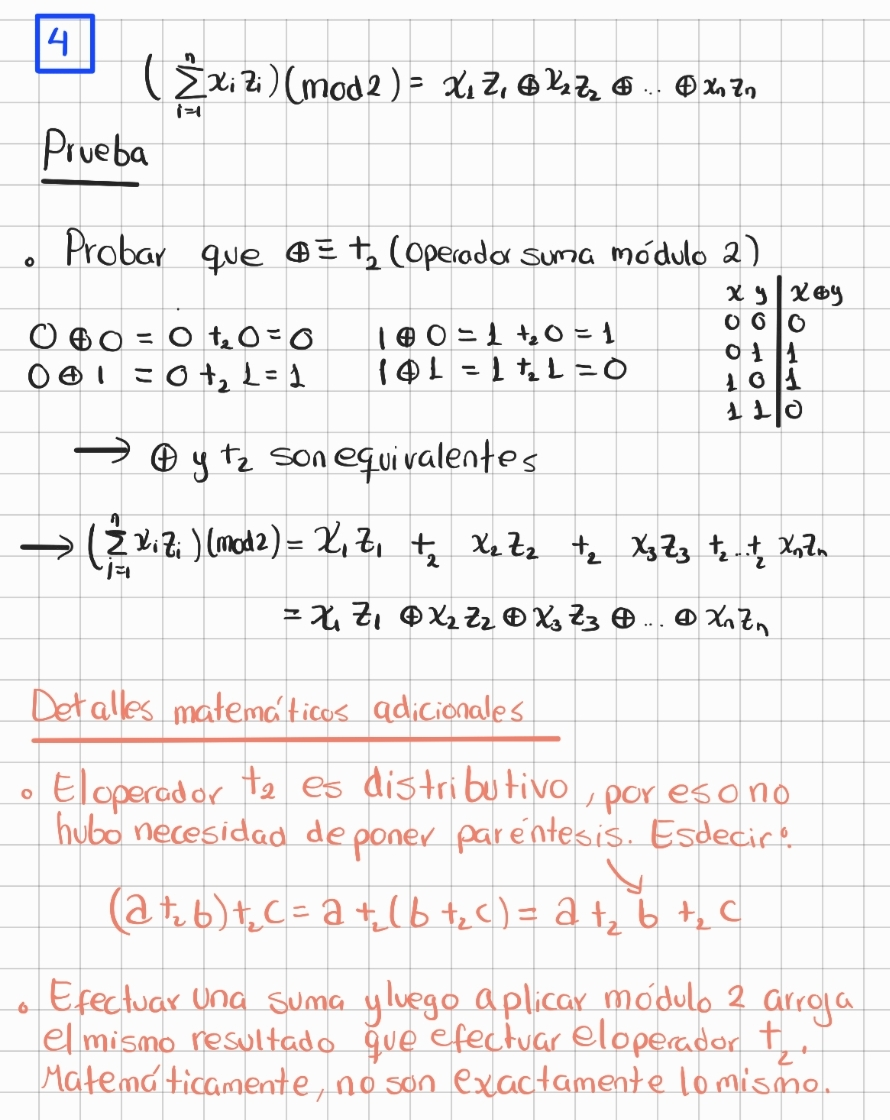

In [ ]:
######################################## Quinta Pregunta ########################################

In [ ]:
#Función Oráculo

In [43]:
def oracle():
    
    qc = QuantumCircuit(4)
    for x in range(2):
        qc.cx(x,3)
    return qc

oracle().draw()

q_0: ──■───────
       │       
q_1: ──┼────■──
       │    │  
q_2: ──┼────┼──
     ┌─┴─┐┌─┴─┐
q_3: ┤ X ├┤ X ├
     └───┘└───┘

In [45]:
oraculo_b = QuantumCircuit(4)
for x in range(2):
    oraculo_b.cx(x,3)
oraculo_b.draw()


q_0: ──■───────
       │       
q_1: ──┼────■──
       │    │  
q_2: ──┼────┼──
     ┌─┴─┐┌─┴─┐
q_3: ┤ X ├┤ X ├
     └───┘└───┘

In [ ]:
#Circulo total para el problema de Deutsch-Jozsa

In [44]:
qcc=QuantumCircuit(4,3)
qcc.x(3)
qcc.h(3)
qcc.barrier()

for x in range(3):
    qcc.h(x)
qcc.barrier()

qcc=qcc.compose(oracle()) # Alternativamente: cambiar "oracle()" por "oraculo_b"
qcc.barrier()

for x in range(3):
    qcc.h(x)
qcc.barrier()

qcc.measure([0,1,2],[0,1,2])
qcc.draw()

░ ┌───┐ ░            ░ ┌───┐ ░ ┌─┐      
q_0: ───────────░─┤ H ├─░───■────────░─┤ H ├─░─┤M├──────
                ░ ├───┤ ░   │        ░ ├───┤ ░ └╥┘┌─┐   
q_1: ───────────░─┤ H ├─░───┼────■───░─┤ H ├─░──╫─┤M├───
                ░ ├───┤ ░   │    │   ░ ├───┤ ░  ║ └╥┘┌─┐
q_2: ───────────░─┤ H ├─░───┼────┼───░─┤ H ├─░──╫──╫─┤M├
     ┌───┐┌───┐ ░ └───┘ ░ ┌─┴─┐┌─┴─┐ ░ └───┘ ░  ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─░───────░─┤ X ├┤ X ├─░───────░──╫──╫──╫─
     └───┘└───┘ ░       ░ └───┘└───┘ ░       ░  ║  ║  ║ 
c: 3/═══════════════════════════════════════════╩══╩══╩═
                                                0  1  2

In [ ]:
######################################## Sexta Pregunta ########################################

In [ ]:
#Respuesta: Sí, por ejemplo para la función oráculo de la pregunta 5 se han utilizado dos compuertas cx(se esperaba tener 3 compuertas cx). Se ha prescindido de una compuerta cx
#y aun así se ha conseguido un oráculo balanceado

In [ ]:
######################################## Séptima Pregunta ########################################

In [8]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library import XGate,ZGate
from qiskit.visualization import plot_histogram
from qiskit import execute, Aer

In [15]:
def oracle_part(qc,qr):
    mcx = XGate().control(3)
    
    #Los qubits del 0 al 4 son los nodos.
    #Los qubits del 5 al 10 nos permiten reconocer si la arista es correcta
    #(i.e. si se da entre nodos de distinto color).
    qc.cx(qr[0], qr[5])
    qc.cx(qr[3], qr[5])
    qc.barrier()
    qc.cx(qr[0], qr[6])
    qc.cx(qr[4], qr[6])
    qc.barrier()
    qc.cx(qr[1], qr[7])
    qc.cx(qr[3], qr[7])
    qc.barrier()
    qc.cx(qr[1], qr[8])
    qc.cx(qr[4], qr[8])
    qc.barrier()
    qc.cx(qr[2], qr[9])
    qc.cx(qr[3], qr[9])
    qc.barrier()
    qc.cx(qr[2], qr[10])
    qc.cx(qr[4], qr[10])
    qc.barrier()

    #Los qubits del 11 al 13 nos van a permitir contar la cantidad de aristas correctas
    #de tal forma que la suma será expresada en binario con cifras dadas por q_11, q_12 y q_13.
    qc.barrier()    
    qc.cx(qr[5],qr[11])
    qc.barrier()
    
    qc.ccx(qr[6], qr[11], qr[12])
    qc.cx(qr[6],qr[11])
    qc.barrier()
    
    qc.ccx(qr[7], qr[11], qr[12])
    qc.cx(qr[7],qr[11])
    qc.barrier()
    
    qc.append(mcx,[8,11,12,13])
    qc.ccx(qr[8], qr[11], qr[12])
    qc.cx(qr[8],qr[11])
    qc.barrier()
    
    qc.append(mcx,[9,11,12,13])
    qc.ccx(qr[9], qr[11], qr[12])
    qc.cx(qr[9],qr[11])
    qc.barrier()

    qc.append(mcx,[10,11,12,13])
    qc.ccx(qr[10], qr[11], qr[12])
    qc.cx(qr[10],qr[11])
    qc.barrier()

    qc.x(qr[11])
    qc.barrier()
    
    #El qubit 14 indicará cuando se haya encontrado un estado deseado
    qc.append(mcx,[11,12,13,14])
    
    return qc

In [16]:
def oracle(qc,qr):
    
    qc=oracle_part(qc,qr)
    qc1=qc.inverse()
    qc.z(14)
    qc.compose(qc1,inplace=True)
    
    return qc

In [17]:
def grover_diffusion(qc,qr):
    mcz = ZGate().control(4)
    
    qc.barrier()
    qc.h(range(5))
    qc.x(range(5))
    qc.append(mcz,list(range(0,5)))
    qc.x(range(5))
    qc.h(range(5))
    qc.barrier()
    return qc

In [18]:
def grover(qc,qr):
    return grover_diffusion(oracle(qc,qr),qr)

In [19]:
qr=QuantumRegister(15)
qc=QuantumCircuit(qr)

qra=QuantumRegister(15)
cra=ClassicalRegister(5)
qa=QuantumCircuit(qra,cra)

qa.h(range(5))
qb=grover(qc,qr)
qa.compose(qb.compose(qb.compose(qb)),inplace=True)

qa.measure(range(5),cra)

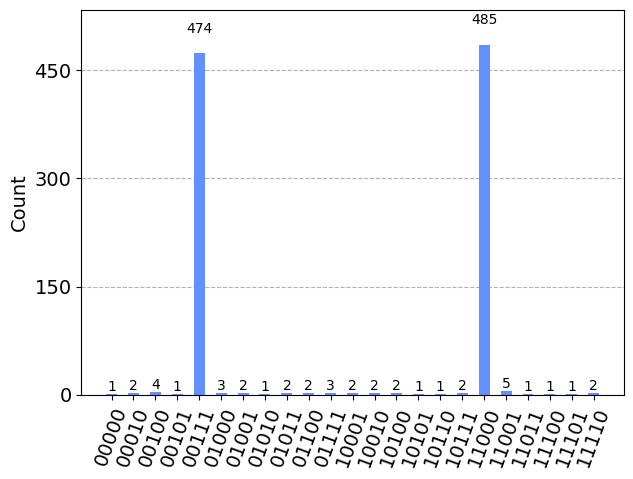

In [20]:
qasm_simulator = Aer.get_backend('qasm_simulator')

job = execute(qa, qasm_simulator, shots = 1000)
counts = job.result().get_counts(qa)

plot_histogram(counts)

In [ ]:
######################################## Octava Pregunta #########################################

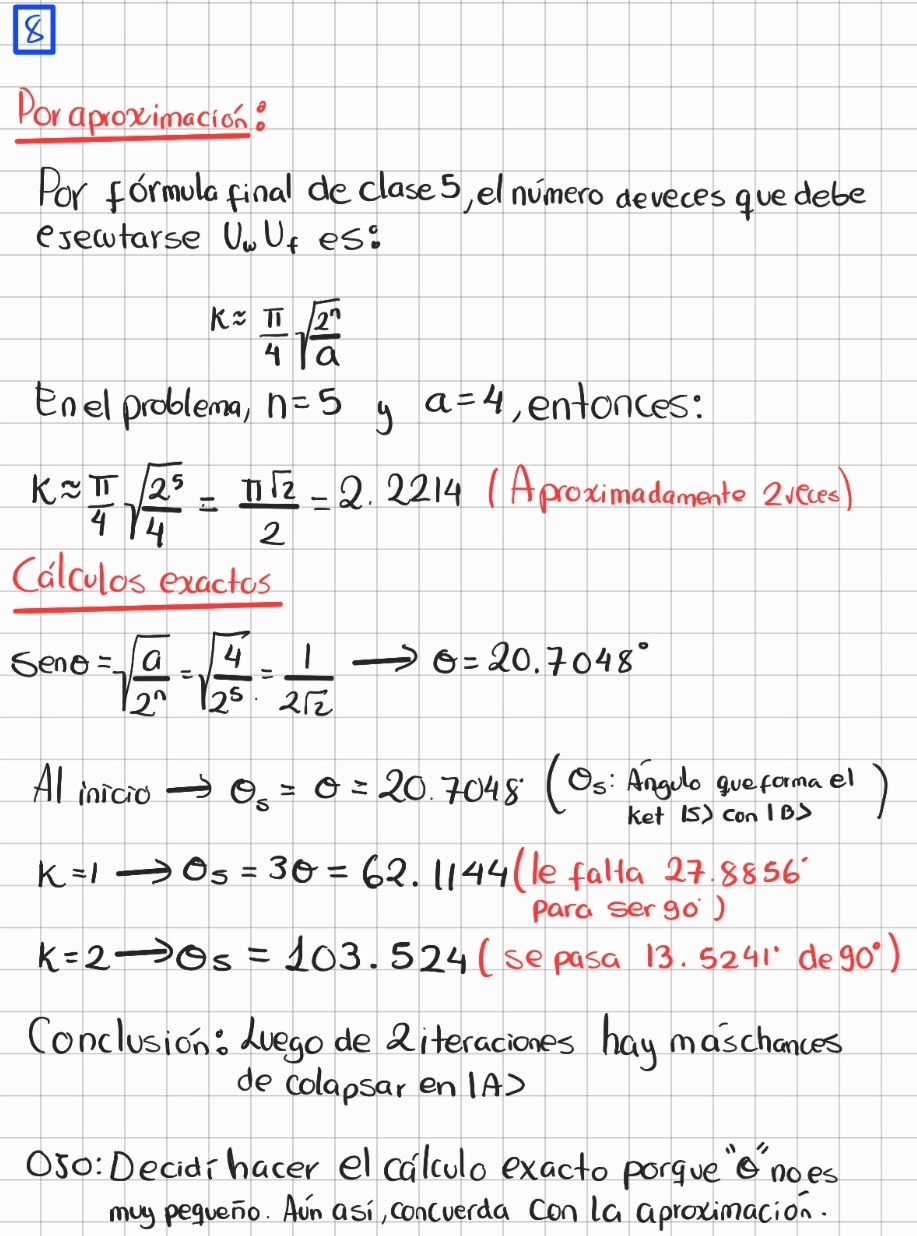

In [ ]:
############################################## Extra 1 ###########################################

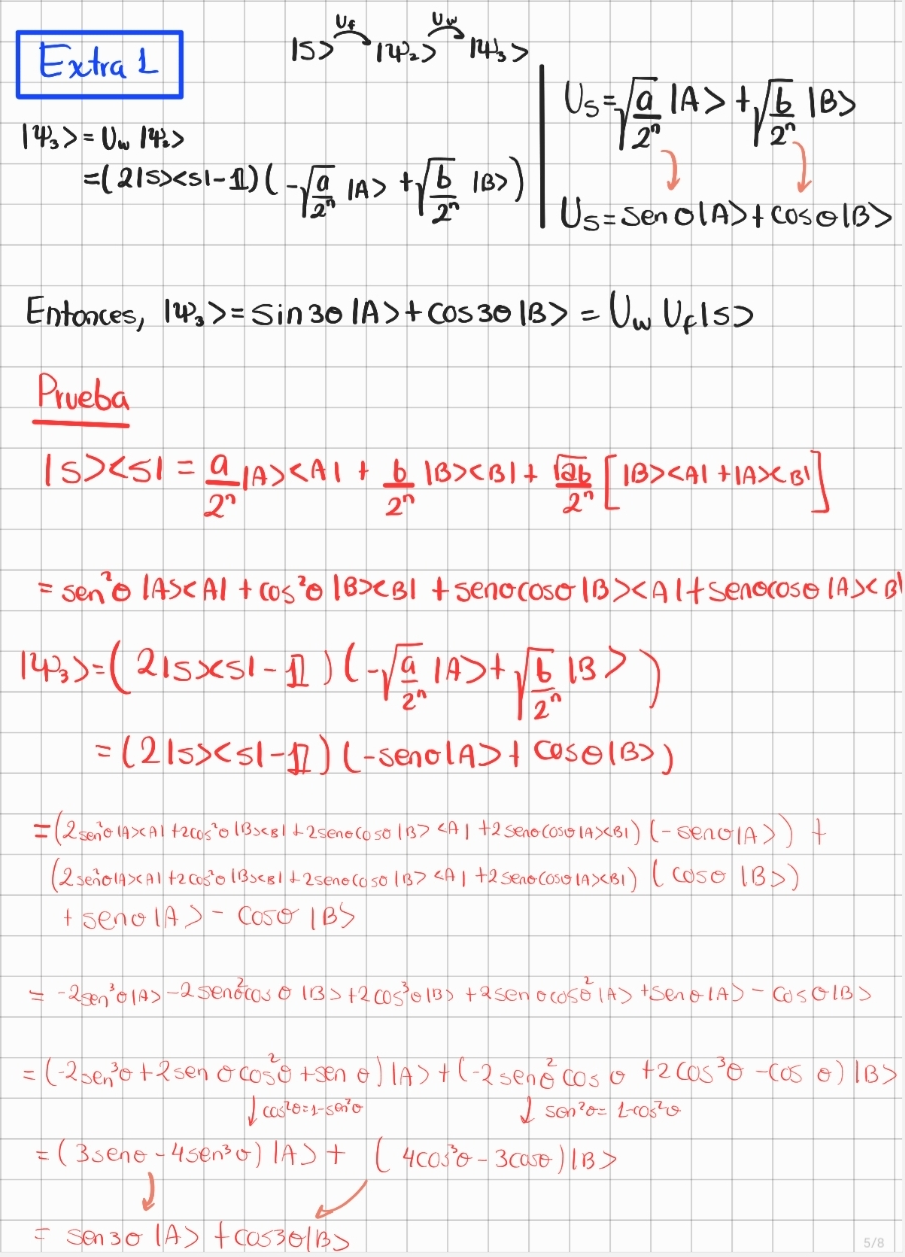

## Clase 6:

9.- La implementación de QFT se probó preparando el estado de Fourier $|\widetilde{5}\rangle$ para el cual $\text{QFT}^{\dagger}|\widetilde{5}\rangle= |101\rangle$. Intenta encontrar el estado $|a\rangle$ tal que $\text{QFT}^{\dagger}|a\rangle = |100\rangle$.

10.- Encuentra el estado $|b\rangle$ tal que $\text{QFT}^{\dagger}|b\rangle = |011\rangle$.

Extra 3. Intente escribir la función QFT sin recursividad. Utilice el simulador unitario de Qiskit para verificar sus resultados.

In [ ]:
############################################## Novena Pregunta ###########################################

In [3]:
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)

In [4]:
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

In [5]:
def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

In [10]:
qc = QuantumCircuit(3)
qc.x(2)
qft(qc,3)
Statevector(qc).draw("Latex")

<IPython.core.display.Latex object>

In [ ]:
############################################## Décima Pregunta ###########################################

In [11]:
qc = QuantumCircuit(3)
qc.x(0)
qc.x(1)
qft(qc,3)
Statevector(qc).draw("Latex")

<IPython.core.display.Latex object>

In [ ]:
################################################## Extra 3 ###############################################

In [ ]:
#Aquí he definido qft con doble interación for

In [47]:
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit

    for i in range(n-1,-1,-1):
        circuit.h(i)
        for qubit in range(i):
            circuit.cp(pi/2**(i-qubit), qubit, i)

    return circuit

In [48]:
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

In [49]:
def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

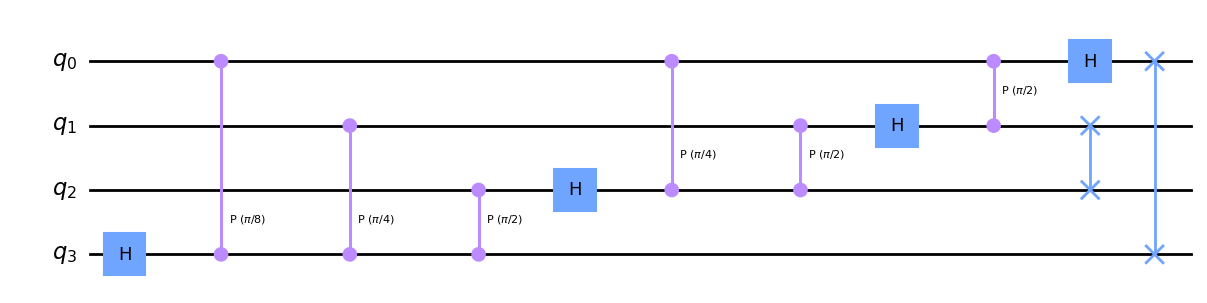

In [50]:
qc = QuantumCircuit(4)
qft(qc,4)
qc.draw(output='mpl')

In [ ]:
#Este circuito coincide con el circuito visto en clase

In [ ]:
#Adicionalmente se verificará con el simulador de Qiskit que aplicar este QFT inverso sobre el estado de Fourier 5 da como resultado el estado 5
#(Verificación sobre resultados conocidos de clase)

In [56]:
from qiskit import execute, Aer

In [51]:
def inverse_qft(circuit, n):
    """Does the inverse QFT on the first n qubits in circuit"""
    # First we create a QFT circuit of the correct size:
    qft_circ = qft(QuantumCircuit(n), n)
    # Then we take the inverse of this circuit
    invqft_circ = qft_circ.inverse()
    # And add it to the first n qubits in our existing circuit
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit.decompose() # .decompose() allows us to see the individual gates

In [52]:
#Preparando estado de Fourier 5
nqubits = 3
number = 5
qc = QuantumCircuit(nqubits)
for qubit in range(nqubits):
    qc.h(qubit)
qc.p(number*pi/4,0)
qc.p(number*pi/2,1)
qc.p(number*pi,2)

In [53]:
#Aplicando QFT inverso
qc = inverse_qft(qc, nqubits)
qc.measure_all()

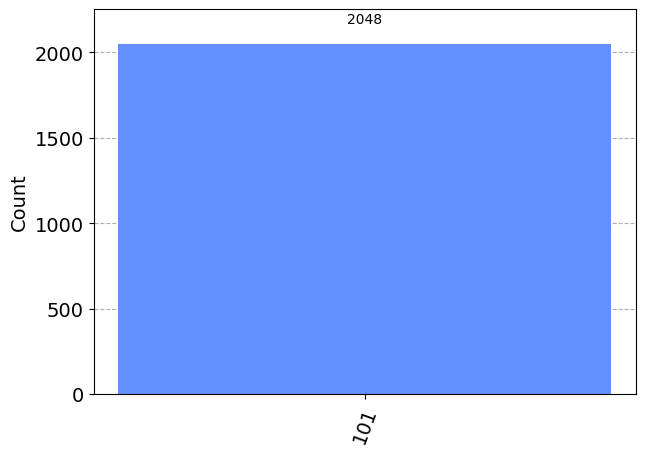

In [60]:
#Simulación
qasm_simulator = Aer.get_backend('qasm_simulator')

job = execute(qc, qasm_simulator, shots = 2048)
counts = job.result().get_counts(qc)

plot_histogram(counts)

In [ ]:
#Esta simulación coincide con el resultado real de clase. Así verificamos que esta nueva función QFT funciona bien.

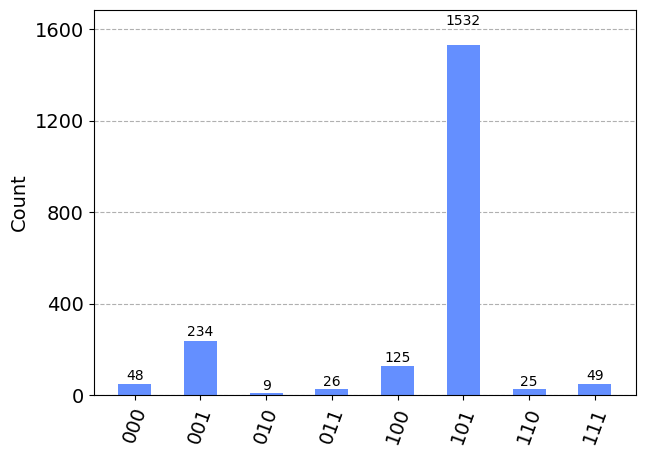